In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,2000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes

####### Calculating on the /gpu:0 #######
[[127.94 132.4  126.   ... 126.1  128.5  126.5 ]
 [125.56 124.9  126.9  ... 125.44 128.5  127.25]
 [128.2  125.5  129.5  ... 123.4  129.4  123.8 ]
 ...
 [121.94 125.3  124.9  ... 118.8  126.44 125.8 ]
 [115.56 115.94 116.5  ... 115.8  118.56 113.44]
 [127.56 133.4  128.8  ... 129.6  131.8  128.2 ]]
{'/gpu:0': [0.6492760181427002], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[124.56 123.   126.75 ... 119.4  120.1  125.8 ]
 [123.   126.6  123.5  ... 115.3  118.8  124.6 ]
 [121.44 119.9  118.44 ... 113.9  117.6  122.9 ]
 ...
 [125.3  125.25 126.25 ... 121.   123.   128.2 ]
 [123.6  121.1  123.6  ... 115.75 116.75 124.5 ]
 [124.25 121.75 121.1  ... 114.5  117.94 122.06]]
{'/gpu:0': [0.6492760181427002], '/cpu:0': [1.0375828742980957]}
####### Calculating on the /gpu:0 #######
[[144.4  137.9  142.5  ... 136.2  143.2  134.4 ]
 [137.1  130.   131.9  ... 123.1  137.9  126.56]
 [142.4  138.4  140.5  ... 137.1  146.1  137.5 ]
 ...
 [140.8  1

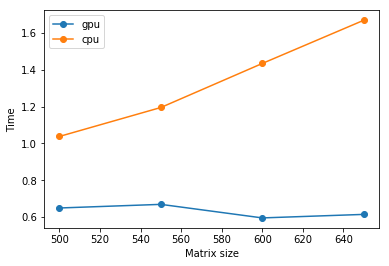

In [12]:
device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', label='gpu')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', label='cpu')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.legend()
plt.show()